# Preprocessing

## General Imports

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

## Combine Raw Data
* Uses both files from the first folder of the UCI data

In [52]:
files = ['EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt',
         'EMG_data_for_gestures-master/02/2_raw_data_14-21_22.03.16.txt']
df = pd.DataFrame()
for file in files:
    f = open(file, 'r')
    f = f.readlines()
    for count, val in enumerate(f):
        row = val.split("\t")
        row[-1] = row[-1][:-1]
        f[count] = row
    df = pd.concat([df, pd.DataFrame(f[1:], columns=f[0])])
'''

f = open('EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt', 'r')
f = f.readlines()
g = open('EMG_data_for_gestures-master/02/2_raw_data_14-21_22.03.16.txt', 'r')
g = g.readlines()

for count, val in enumerate(f):
	row = val.split("\t")
	row[-1] = row[-1][:-1]
	f[count] = row
for count, val in enumerate(g):
	row = val.split("\t")
	row[-1] = row[-1][:-1]
	g[count] = row
df1 = pd.DataFrame(f[1:], columns=f[0])
df2 = pd.DataFrame(g[1:], columns=g[0])
df = pd.concat([df1, df2])
#df.astype(float) this is optional, but semantically makes more sense. will it run faster?
'''
df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,-1e-05,-3e-05,-2e-05,0,-2e-05,-1e-05,0,-2e-05,0
1,4,-1e-05,-3e-05,-2e-05,0,-2e-05,-1e-05,0,-2e-05,0
2,5,-1e-05,-3e-05,-2e-05,0,-2e-05,-1e-05,0,-2e-05,0
3,6,-1e-05,-3e-05,-2e-05,0,-2e-05,-1e-05,0,-2e-05,0
4,7,-1e-05,-3e-05,-2e-05,0,-2e-05,-1e-05,0,-2e-05,0
...,...,...,...,...,...,...,...,...,...,...
64099,66232,1e-05,3e-05,1e-05,0,-0.0001,-1e-05,-2e-05,-3e-05,0
64100,66233,1e-05,3e-05,1e-05,0,-0.0001,-1e-05,-2e-05,-3e-05,0
64101,66234,1e-05,3e-05,1e-05,0,-0.0001,-1e-05,-2e-05,-3e-05,0
64102,66235,1e-05,3e-05,1e-05,0,-0.0001,-1e-05,-2e-05,-3e-05,0


## Visualize Data

                time       channel1       channel2       channel3  \
count  136426.000000  136426.000000  136426.000000  136426.000000   
mean    35381.406096      -0.000007      -0.000010      -0.000010   
std     20500.820726       0.000154       0.000059       0.000106   
min         1.000000      -0.001280      -0.001070      -0.001020   
25%     17709.000000      -0.000030      -0.000030      -0.000040   
50%     35303.000000      -0.000010      -0.000010      -0.000010   
75%     52819.750000       0.000010       0.000010       0.000020   
max     74525.000000       0.001270       0.000530       0.000830   

            channel4       channel5       channel6       channel7  \
count  136426.000000  136426.000000  136426.000000  136426.000000   
mean       -0.000010      -0.000011      -0.000009      -0.000009   
std         0.000255       0.000189       0.000131       0.000143   
min        -0.001280      -0.001280      -0.001280      -0.001280   
25%        -0.000060      -0.0000

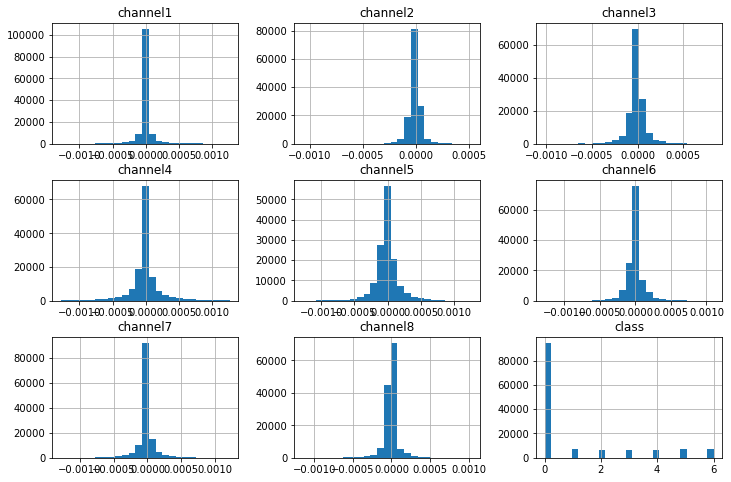

In [53]:
df = df.astype('float')
print(df.describe())
df.drop('time',axis=1).hist(figsize=(12, 8), bins=25)
plt.show()

* Luckily the data is normally distributed
* I will still standardize it just to be safe and I'd imagine it's just good practice

## Create sample dataframe
* To create the sample first define what X and y are. X is the array of (samples, features) and y  is the 1d-array of classes.
* After scaling the X values with fit_transform, we can combine it together.
* Then we drop the many duplicate values, since the EMG records every millisecond and is bound to have duplicates
* Removes all rows where the class is 0, since this is unmarked data according to the UCI data

In [80]:
xcols = df.columns[1:-1]
X = df[xcols]
y = df[['class']]
scaler = StandardScaler()
X[xcols] = scaler.fit_transform(X[xcols].values) #X[xcols] = not X = since we can maintain a dataframe for X

sample = pd.concat([X, y], axis=1)
sample.drop_duplicates(inplace=True) #helps prevent overfitting im assuming
sample = sample[sample['class'] != 0.0] #if features are floats, change to 0.0 instead of '0' and vice versa
sample


<ipython-input-80-1034bbb64330>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[xcols] = scaler.fit_transform(X[xcols].values) #X[xcols] = not X = since we can maintain a dataframe for X
C:\Users\14024\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\14024\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
2755,0.043303,0.168747,0.282566,0.118342,0.059060,-0.008965,-0.009804,-0.102170,1.0
2773,0.043303,-0.172186,-0.094078,-0.038498,-0.046745,-0.162162,-0.149694,-0.102170,1.0
2774,-0.021549,0.339214,-0.094078,-0.038498,0.111962,0.067633,-0.009804,0.090251,1.0
2785,-0.021549,-0.683586,-0.659046,-0.195338,-0.152551,0.067633,0.130086,0.090251,1.0
2793,-0.021549,0.168747,0.659211,0.079132,0.006157,0.067633,0.060141,-0.005960,1.0
...,...,...,...,...,...,...,...,...,...
61816,-0.280956,0.168747,-0.282401,-0.195338,-0.946089,-0.545153,-0.009804,0.090251,6.0
61829,-0.086401,0.509681,0.188405,-0.195338,-0.364161,-0.621751,-2.317987,-1.641536,6.0
61830,0.237857,-0.001719,0.282566,0.000712,0.746793,0.910212,3.417498,1.725826,6.0
61851,-0.151252,-0.342653,-0.094078,-0.038498,1.857747,0.910212,1.039370,0.571302,6.0


* Taking a look at the data, notice that many indices are missing, specifically from 64000 to around 4600.
* The new sample dataframe again removes duplicate rows and rows where the class is 0.0.
* The values are also different, since they are now in terms of standard deviations instead of the raw EMG output
* Just to clarify, every row of this dataframe is a group. Every row is a reading from the EMG, recording the output of the electrodes and which movement (class) the subject is performing

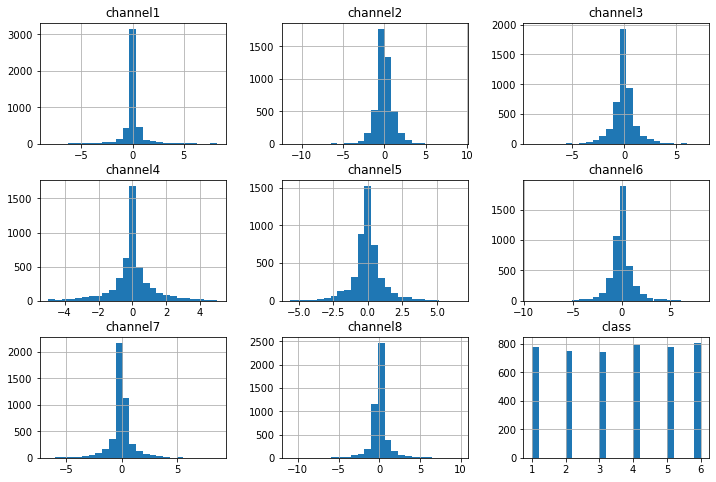

In [81]:
sample.hist(figsize=(12,8), bins=25)
plt.show()

# Model

## Split train/test data

In [95]:
from sklearn.model_selection import train_test_split

sample.to_csv("newsample.csv")
sampleX = sample[xcols]
sampley = sample[['class']]

X_train, X_test, y_train, y_test = train_test_split(
    sampleX, sampley, test_size=0.2, stratify=sample[['class']], random_state=43) #add random_state=int as arg if you want to use the same random seed
for i in [1,2,3,4,5,6]:
    print(f"{len(y_test[y_test['class'] == i].index)} test samples in class {i}")

156 test samples in class 1
150 test samples in class 2
149 test samples in class 3
158 test samples in class 4
155 test samples in class 5
161 test samples in class 6


## Create model

In [83]:
neighbors=5

model = KNeighborsClassifier(n_neighbors=neighbors)
model.fit(X_train.values, y_train.values)
#loaded_model = pickle.load(open('emgknn.sav', 'rb')) was testing old model
model.score(X_test, y_test)

C:\Users\14024\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\14024\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.6964477933261571

## Test Model
* I realize now that in my original model, these metrics used all y values, including the training data oops
* I fixed it, and luckily scores haven't dropped significantly. The only issue is precision is slightly below 70%

In [84]:
y_pred = model.predict(X_test.values)
y_true = y_test.values

In [85]:
precision_score(y_true, y_pred, average='weighted')

0.6953591659415862

In [86]:
cohen_kappa_score(y_true, y_pred)

0.6357845331672445

In [87]:
roc_auc_score(y_true, model.predict_proba(X_test.values), multi_class='ovr')

0.9116694516158689

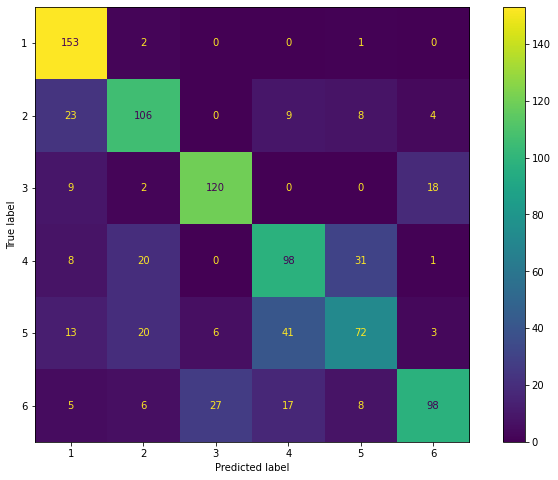

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(12, 8))

cm = confusion_matrix(y_true, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])
cmp.plot(ax=ax)

plt.show()

* This matrix depicts the true positives, false positives, true negatives, and false negatives.
* On the y-axis, you have the true classifications. On the first row, for example, the model predicted a value that really was class 1 as class 1 213 times, predicted a value that really was class 1 as class 2 one time, and so on.
* We can see that the model has the most trouble differentiating between movements 4 and 5.

* If something like this is implemented, something like the iPhone touch/face ID can be used.
* User does a movement of their choice. Basic conditionals can be used if movement is not good enough
* After 5 or 6 movements, a confusion matrix can be made, and if precision is too low, redo necessary movements